In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/archive/dogvscat_small/train",
    image_size=(128,128),
    batch_size=32,
    label_mode='binary' # or 'categorical'
)

test_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/archive/dogvscat_small/test",
    image_size=(128,128),
    batch_size=32,
    label_mode='binary'
)

Found 2002 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


# without maxpooling

In [40]:
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(16, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 124, 124, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,495,825 (120.15 MB)

 Trainable params: 31,495,825 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

In [43]:
callbacks = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [44]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[callbacks]
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.5098 - loss: 1149.2994 - precision: 0.5237 - recall: 0.5713 - val_accuracy: 0.5310 - val_loss: 0.6947 - val_precision: 0.5314 - val_recall: 0.5240
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.7309 - loss: 0.6070 - precision: 0.7629 - recall: 0.6931 - val_accuracy: 0.5330 - val_loss: 0.7074 - val_precision: 0.5290 - val_recall: 0.6020
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.9054 - loss: 0.3242 - precision: 0.8989 - recall: 0.9199 - val_accuracy: 0.5470 - val_loss: 0.8870 - val_precision: 0.5514 - val_recall: 0.5040
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.9635 - loss: 0.1151 - precision: 0.9575 - recall: 0.9690 - val_accuracy: 0.5600 - val_loss: 1.1365 - val_precision: 0.5691 - val_recall: 0.4940
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.9983 - loss: 0.0167 - precision: 0.9993 - recall: 0.9973 - val_accuracy: 0.5560 - val_

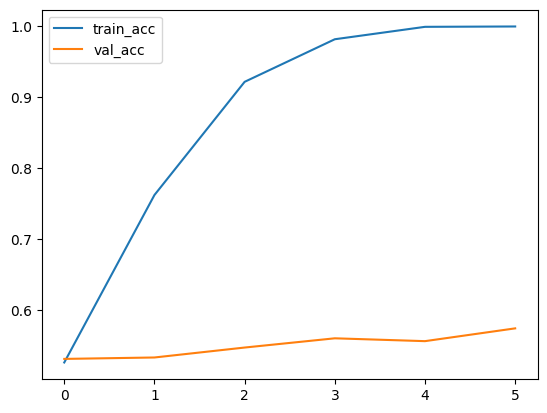

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [46]:
import numpy as np
y_prob = model.predict(test_data)
y_pred = (y_prob > 0.5).astype(int)

y_true = np.concatenate([y for x, y in test_data], axis=0)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step
Accuracy : 0.511
Precision: 0.5111561866125761
Recall   : 0.504
F1 Score : 0.5075528700906344


# With max pooling

In [47]:
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [48]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,848,977 (7.05 MB)

 Trainable params: 1,848,977 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

In [50]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[callbacks]
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.4920 - loss: 66.3140 - precision: 0.5097 - recall: 0.5256 - val_accuracy: 0.5550 - val_loss: 0.6909 - val_precision: 0.6007 - val_recall: 0.3280
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.6671 - loss: 0.6371 - precision: 0.7074 - recall: 0.5952 - val_accuracy: 0.5520 - val_loss: 0.7072 - val_precision: 0.5607 - val_recall: 0.4800
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.8035 - loss: 0.4705 - precision: 0.7975 - recall: 0.8168 - val_accuracy: 0.5600 - val_loss: 0.7872 - val_precision: 0.5655 - val_recall: 0.5180
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.8623 - loss: 0.3341 - precision: 0.8548 - recall: 0.8802 - val_accuracy: 0.5510 - val_loss: 0.8848 - val_precision: 0.5597 - val_recall: 0.4780
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9154 - loss: 0.2230 - precision: 0.9212 - recall: 0.9165 - val_accuracy: 0.5750 - val_lo

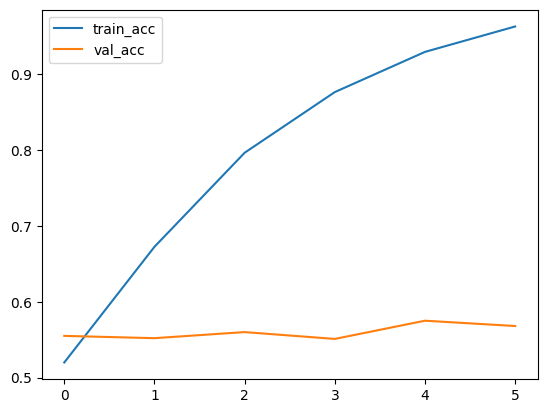

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [52]:
import numpy as np
y_prob = model.predict(test_data)
y_pred = (y_prob > 0.5).astype(int)

y_true = np.concatenate([y for x, y in test_data], axis=0)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step
Accuracy : 0.495
Precision: 0.4908424908424908
Recall   : 0.268
F1 Score : 0.34670116429495473
